# Import the datasets

In [0]:
from keras.datasets import fashion_mnist, cifar10

(trainX, trainY), (testX, testY) = fashion_mnist.load_data() # (60000, 28, 28)
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # (50000, 32, 32, 3)

Visualize the data

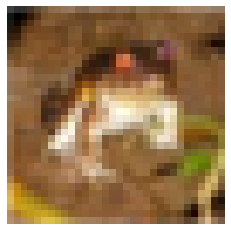

6


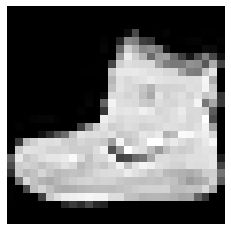

9


In [66]:
import matplotlib.pyplot as plt
target = 0
plt.figure()
plt.imshow(x_train[target,:])
plt.axis('off')
plt.show()
print(y_train[target])

plt.figure()
plt.imshow(trainX[target,:],cmap='gray')
plt.axis('off')
plt.show()
print(trainY[target])

Pre-processing

In [0]:
import numpy as np

y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

Reshape into vector format for non-convolutional algos

In [0]:
x_train = np.reshape(x_train,(x_train.shape[0],-1)) # (50000, 3072)
trainX = np.reshape(trainX,(trainX.shape[0],-1)) # (60000, 784)

One-hot encoding

In [0]:
import keras
num_classes = 10
onehot_y_train = keras.utils.to_categorical(y_train, num_classes)
onehot_y_test = keras.utils.to_categorical(y_test, num_classes)
onehot_trainY = keras.utils.to_categorical(trainY, num_classes)
onehot_testY = keras.utils.to_categorical(testY, num_classes)

# Implement NN Using Keras

Fashion MNIST Training

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adagrad, Adam

model = Sequential([
  # Input Layer, Hidden layer
  Dense(1024, use_bias=False, input_shape=(trainX.shape[1],)),
  BatchNormalization(),
  Activation('relu'),

  # Output layer
  Dense(10,use_bias=False),
  BatchNormalization(),
  Activation('softmax'),
])

model.compile(
  Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

history = model.fit(trainX, onehot_trainY, epochs=20, batch_size=64, validation_split=0.2, verbose=0)

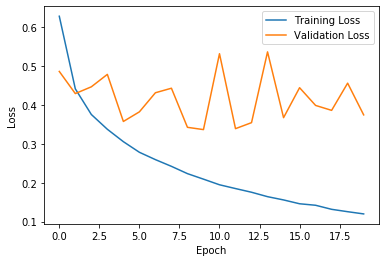

In [70]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

CIFAR-10 Training

In [0]:
model = Sequential([
  # Input Layer, Hidden layer
  Dense(1024,use_bias=False, input_shape=(x_train.shape[1],)),
  BatchNormalization(),
  Activation('relu'),

  # Output layer
  Dense(10,use_bias=False),
  BatchNormalization(),
  Activation('softmax'),
])

model.compile(
  Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

history = model.fit(x_train, onehot_y_train, epochs=20, batch_size=64, validation_split=0.2,verbose=0)

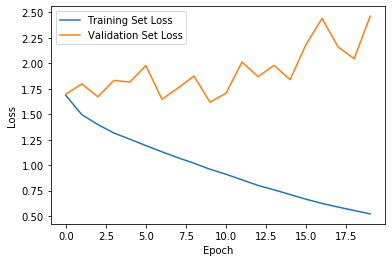

In [72]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()